# Data Cleaning

## Objectives
* Get a quick glimpse of the data
* Check for inappropriate inputs
* Decide how to impute missing values
* Decide if and how to stratify the data when splitting
* Split the data
* Save the data

#### Load libraries and data

In [2]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# load data

heart = pd.read_csv("heart.csv")
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## 1. Get a quick glimpse of the data

In [3]:
# find length of dataframe

print(f"Data contains {len(heart)} rows.")

Data contains 303 rows.


In [4]:
# print dataframe info

print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


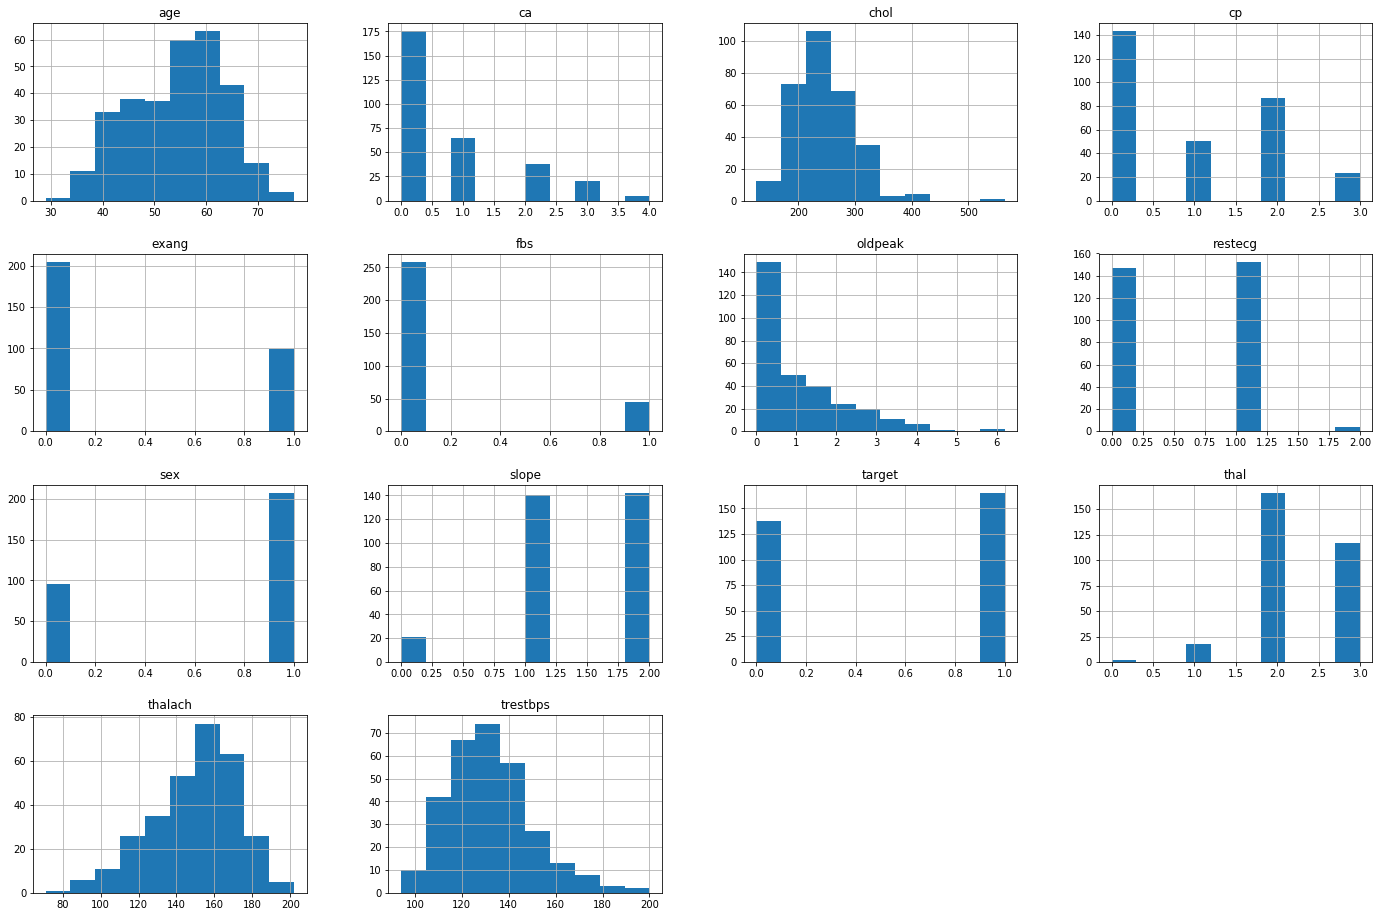

In [5]:
# examine histograms of the features

heart.hist(figsize=(24, 16))
plt.show()

## 2. Check for innappropriate inputs

Since all the columns are numerical I will check for innappropriate inputs by displaying the minimum and maximum values for each column.

In [6]:
# display the maximum and minimum values for each column
table = []
for col in heart.columns:
    table.append(
        {
            "Column":col, 
            "Minimum":heart[col].min(), 
            "Maximum":heart[col].max()
        }
    )
    
table = pd.DataFrame(table)
table.set_index("Column", inplace=True)
table

Maximum  Minimum
Column                    
age          77.0     29.0
sex           1.0      0.0
cp            3.0      0.0
trestbps    200.0     94.0
chol        564.0    126.0
fbs           1.0      0.0
restecg       2.0      0.0
thalach     202.0     71.0
exang         1.0      0.0
oldpeak       6.2      0.0
slope         2.0      0.0
ca            4.0      0.0
thal          3.0      0.0
target        1.0      0.0

Next I will plot a boxplot for each column.

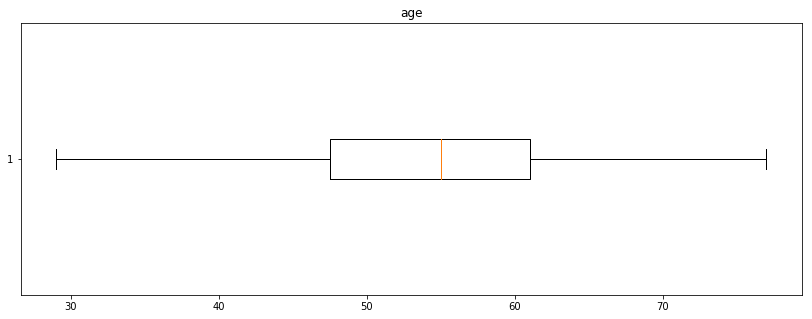

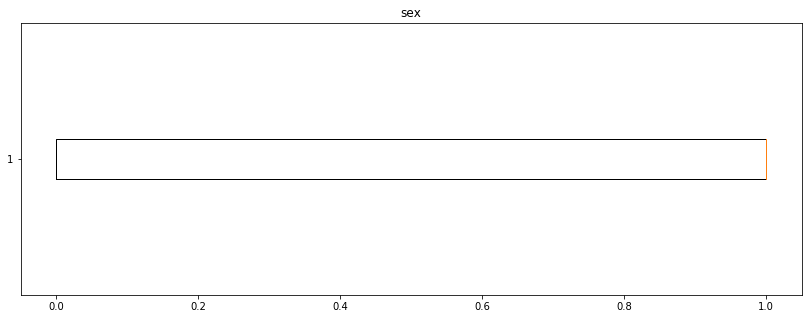

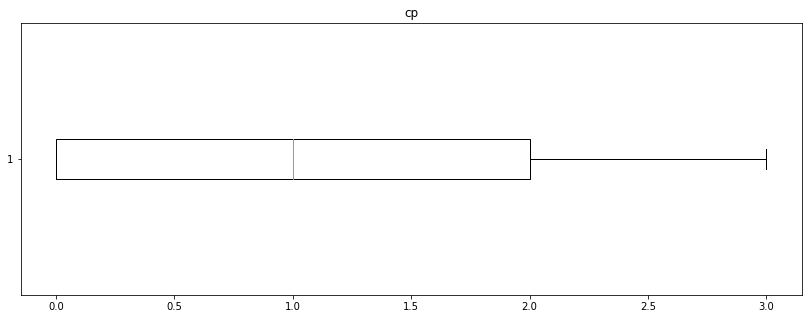

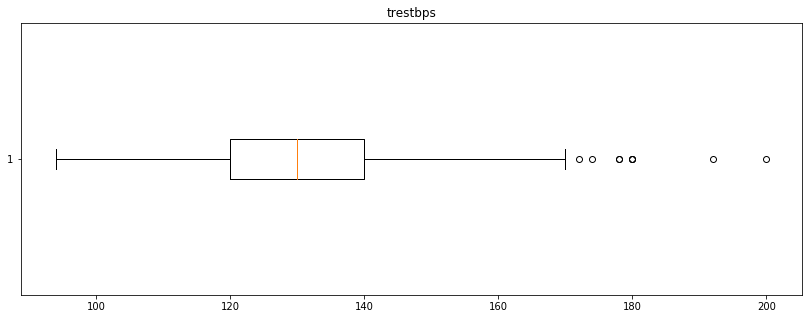

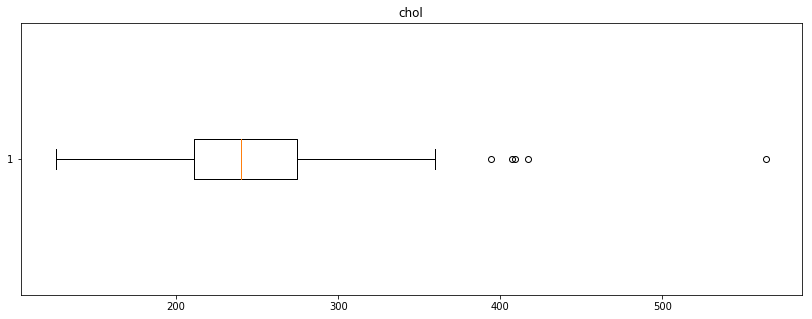

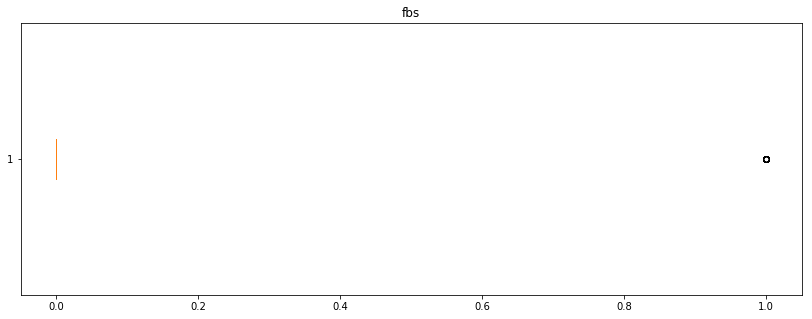

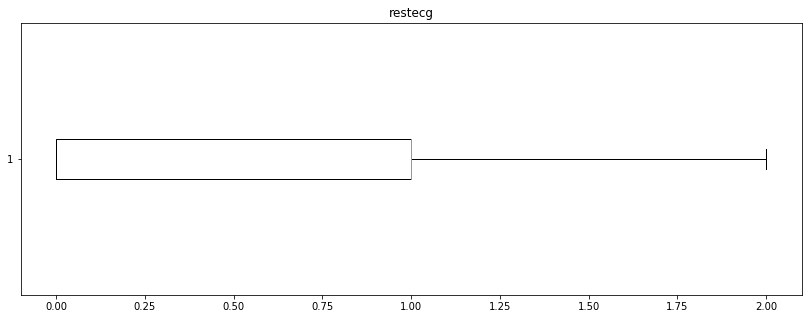

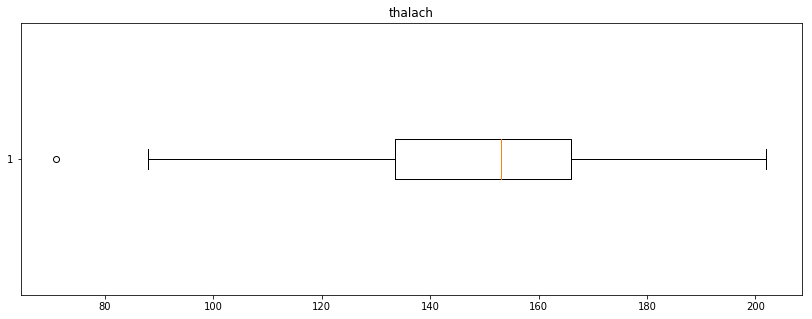

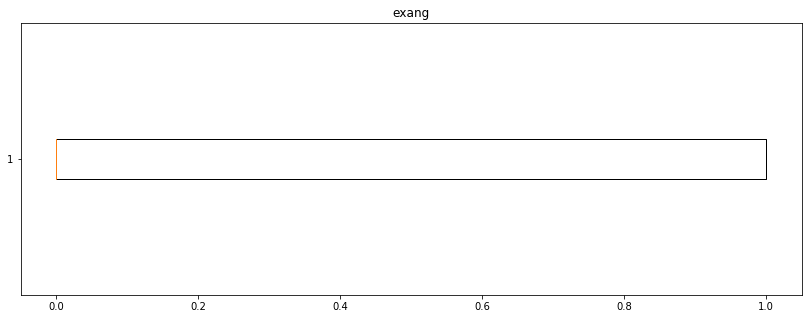

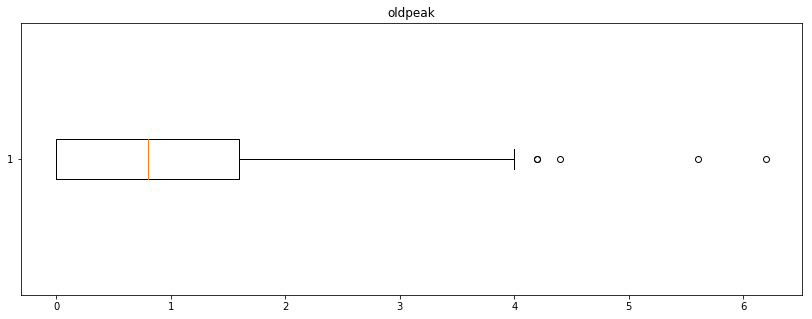

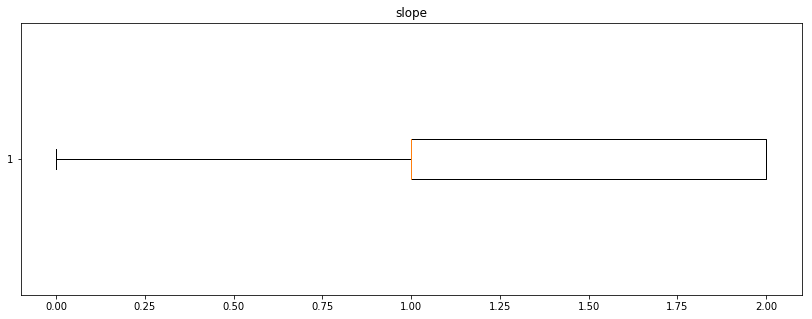

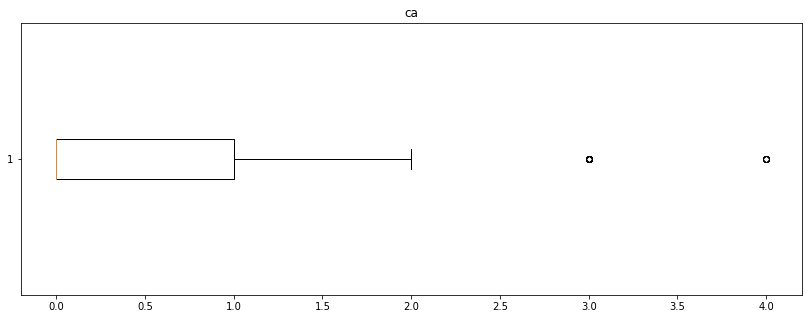

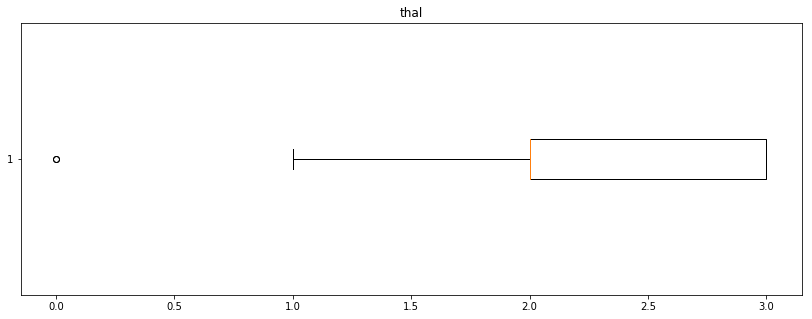

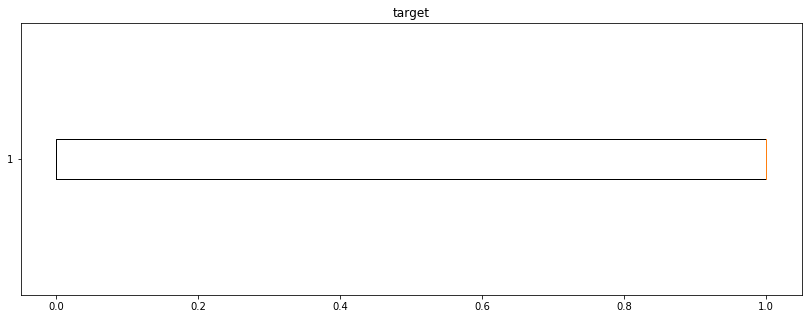

In [7]:
# plot boxplots for each column
for col in heart.columns:
    plt.figure(figsize=(14, 5))
    plt.boxplot(heart[col], vert=False)
    plt.title(col)
    plt.show()

## 3. One hot encode columns

In [8]:
# one hot encode catigorical columns

# get categorical columns
cat_cols = []
for col in heart.columns:
    if (heart[col].nunique() < 10) & (col != "target") & (col != "sex"):
        cat_cols.append(col)
        
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(heart[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
heart_dummies = heart.copy()
heart_dummies.drop(cat_cols, axis=1, inplace=True)
heart= pd.concat([heart_dummies, dummies], axis=1)

heart.head()

age  sex  trestbps  chol  thalach  oldpeak  target  cp_1  cp_2  cp_3  ...  \
0   63    1       145   233      150      2.3       1     0     0     1  ...   
1   37    1       130   250      187      3.5       1     0     1     0  ...   
2   41    0       130   204      172      1.4       1     1     0     0  ...   
3   56    1       120   236      178      0.8       1     1     0     0  ...   
4   57    0       120   354      163      0.6       1     0     0     0  ...   

   exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  thal_3  
0        0        0        0     0     0     0     0       1       0       0  
1        0        0        0     0     0     0     0       0       1       0  
2        0        0        1     0     0     0     0       0       1       0  
3        0        0        1     0     0     0     0       0       1       0  
4        1        0        1     0     0     0     0       0       1       0  

[5 rows x 23 columns]

## 4. Decide how to stratify the data when splitting

Looking at the histograms is seems the sex column would be a good point to stratify upon.

In [9]:
# split data into train test and validation sets
for train_index, test_index in StratifiedShuffleSplit().split(heart, heart.sex):
    explore = heart.iloc[train_index]
    test = heart.iloc[test_index]

for train_index, val_index in StratifiedShuffleSplit().split(explore, explore.sex):
    train = explore.iloc[train_index]
    val = explore.iloc[val_index]

train.head()

age  sex  trestbps  chol  thalach  oldpeak  target  cp_1  cp_2  cp_3  \
150   66    1       160   228      138      2.3       1     0     0     0   
290   61    1       148   203      161      0.0       0     0     0     0   
147   60    0       150   240      171      0.9       1     0     0     1   
240   70    1       160   269      112      2.9       0     0     1     0   
114   55    1       130   262      155      0.0       1     1     0     0   

     ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  \
150  ...        0        0        1     0     0     0     0       1       0   
290  ...        0        0        1     1     0     0     0       0       0   
147  ...        0        0        1     0     0     0     0       0       1   
240  ...        1        1        0     1     0     0     0       0       0   
114  ...        0        0        1     0     0     0     0       0       1   

     thal_3  
150       0  
290       1  
147       0  
240       1  
114       0  

[5 rows x 23 columns]

In [10]:
val.head()

age  sex  trestbps  chol  thalach  oldpeak  target  cp_1  cp_2  cp_3  \
74    43    0       122   213      165      0.2       1     0     1     0   
39    65    0       160   360      151      0.8       1     0     1     0   
159   56    1       130   221      163      0.0       1     1     0     0   
97    52    1       108   233      147      0.1       1     0     0     0   
202   58    1       150   270      111      0.8       0     0     0     0   

     ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  \
74   ...        0        1        0     0     0     0     0       0       1   
39   ...        0        0        1     0     0     0     0       0       1   
159  ...        0        0        1     0     0     0     0       0       0   
97   ...        0        0        1     0     0     1     0       0       0   
202  ...        1        0        1     0     0     0     0       0       0   

     thal_3  
74        0  
39        0  
159       1  
97        1  
202       1  

[5 rows x 23 columns]

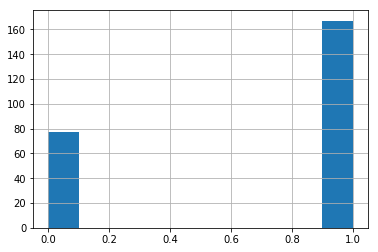

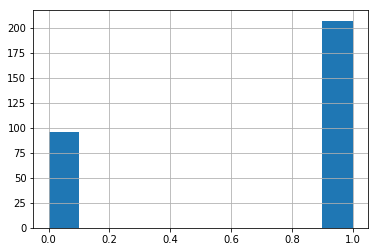

In [12]:
# double check stratification
train.sex.hist()
plt.title("Gender Distribution")
plt.show()
heart.sex.hist();

## 5. Save Data

In [23]:
# save data to csv
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)